## 1. Example of Using Model 1 (Table Detection)


 (2672, 1988, 3)


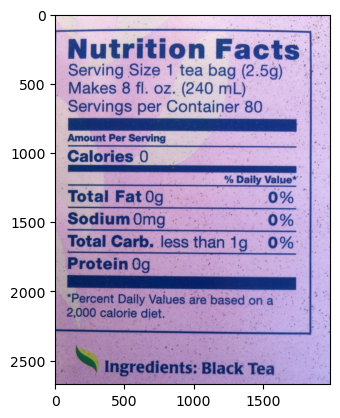

In [9]:
import table_detector # Tabel detector module
import matplotlib.pyplot as plt

# Load the model
detection_model = table_detector.get_model('model/table-detection-model')

# Get the cropped table
image_path = 'testing_image/test_image.jpg'
table = table_detector.get_table(image_path, detection_model)

# Show the result for testing
print('\n',table.shape)
plt.imshow(table)
plt.show()

## 2. Example of Using Model 2 (Text Detection)

## 3. Example of Using Model 3 (OCR)

In [6]:
import ocr # OCR module
import pandas as pd

# Load the model
ocr_model = ocr.get_model('model/ocr-model/crnn_mobilenet_v3_large_20241206-232648.pt')

# Load the image and preprocess it
table = ocr.load_image_into_numpy_array('testing_image/test_image.jpg')

# Load words bounding box
table_words_bbox = pd.read_csv('testing_image/test_image_bbox.csv')

# Get the text list
text_list = ocr.text_list(table, table_words_bbox, ocr_model)

print('\nText list from the image:\n', text_list)

d:\Bangkit-Capstone\Local\ocr_model\ocr.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  reco_params = torch.load(saved_model_path, map_location="cpu")


OCR model sucessfully loaded

Text list from the image:
 ['NutritionFacts', 'SeringSaaiteabag25g', 'Makes8i.oz.240ml', 'SenvingsperContaimer8d', 'AmountPerSenving', 'Calories', '%DailyValue*', 'TotalFatOg', '0%', 'SodiumOmg', '0%', 'TotalCarb.lessthanic', '0%', 'Proteinog', 'Pecatbajlalsabendon', '2000cabrediet', 'Ingredients:Blackea', 'HeyUsAhcNomhaeone', '800-728-0084']
